# Using the Sharpe ratio for stock analysis
<p>An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p>The Sharpe ratio is one method to perform quick portfolio analysis since it compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.</p>
<p>The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. In this analysis we will analyze stocks and use a stock index as benchmark rather than the risk-free interest rate, e.g, the <a href="https://fred.stlouisfed.org/series/TB3MS">3-month Treasury Bill Rate</a>. </p>

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader   #ONLY NEEDED IF YOU'RE PULLING DATA FROM YAHOO
from datetime import date

%matplotlib inline

You can read in example data locally by using the cell below, or pull live data from Yahoo Finance if you have installed Pandas datareader

In [2]:
# Reading in example data

#stock_data = pd.read_csv('../dat/stock_data.csv',parse_dates=['Date'],index_col='Date').dropna()
#benchmark_data = pd.read_csv('../dat/benchmark_data.csv',parse_dates=['Date'],index_col='Date').dropna()


Use the code below if you want to pull data from Yahoo Finance

In [3]:
year = 2018   #can be 2015,2016,2017,2018 because of the 5 year limit from by Yahoo Finance
tickers = ['AAPL','AMZN','FB','GOOG','SSNLF','MCD','TSLA']


start = date(year,1,1)
end = date(year+1,1,1)

stock_data = DataReader(tickers,'yahoo',start,end)['Close'].dropna()
benchmark_data = DataReader('SP500','fred',start,end).dropna()

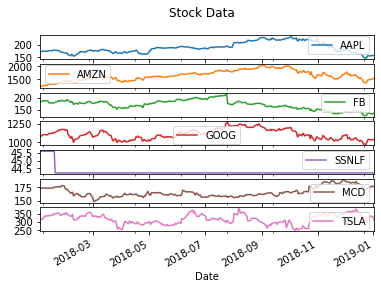

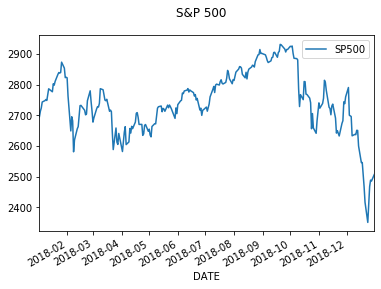

In [4]:
stock_data.plot(subplots=True,title='Stock Data')
benchmark_data.plot(subplots=True,title='S&P 500')
plt.show()

The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next.

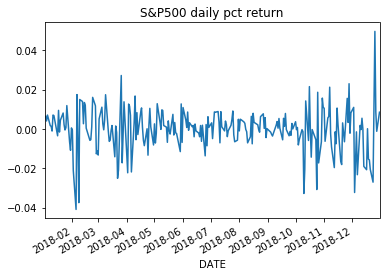

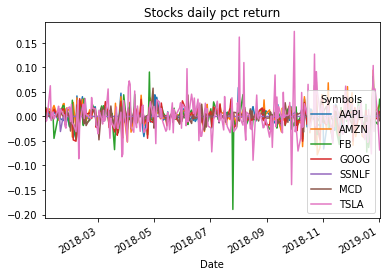

In [5]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# calculate daily benchmark_data returns
sp_returns = benchmark_data[benchmark_data.columns[0]].pct_change()

# plot the daily returns
sp_returns.plot(title='S&P500 daily pct return')
stock_returns.plot(title='Stocks daily pct return')

plt.show()

Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

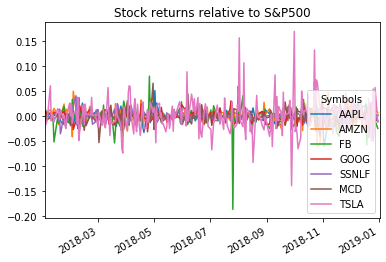

In [6]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns,axis=0)

# plot the excess_returns
excess_returns.plot(title='Stock returns relative to S&P500')

plt.show()

The Sharpe ratio can now be calculated as the ratio of the average of excess_returns and the standard deviation of the excess returns.

<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

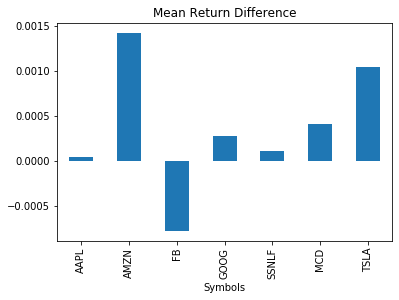

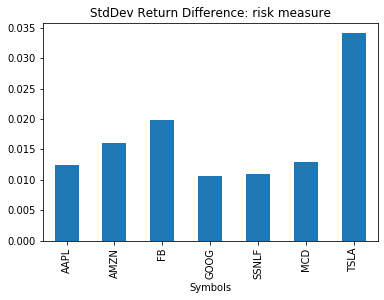

In [7]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

avg_excess_return.plot.bar(title = 'Mean Return Difference' )
plt.show()
# calculate the standard deviations
sd_excess_return = excess_returns.std()

sd_excess_return.plot.bar(title = 'StdDev Return Difference: risk measure' )
plt.show()

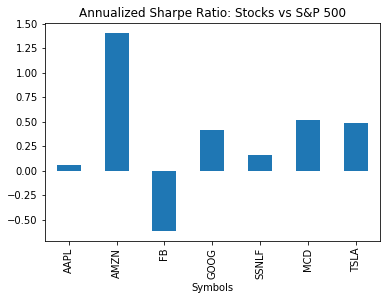

In [8]:
# calculate the daily sharpe ratio
daily_sharpe_ratio =  avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')

plt.show()


In [9]:
print('The stock with the highest Sharpe ratio is: '+ str(annual_sharpe_ratio.idxmax()))

The stock with the highest Sharpe ratio is: AMZN


## Conclusion

The analysis shows which investment you should go for. The Sharpe Ratio provides us the tool to compare different stocks while taking into account the inherent risks when investing in it and helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.